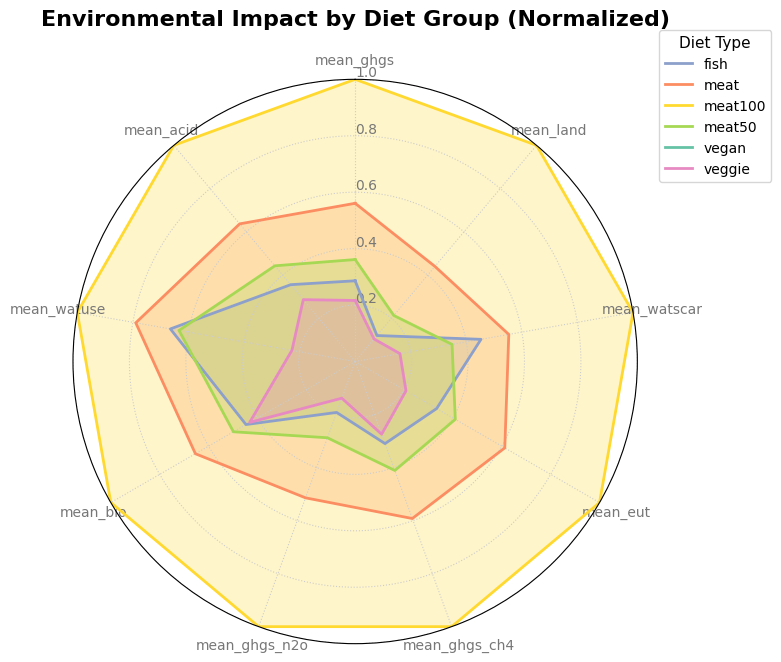

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("Results_21Mar2022.csv")

# Select relevant columns: 9 environmental indicators + diet group
columes = [
    "diet_group",
    "mean_ghgs", "mean_land", "mean_watscar",
    "mean_eut", "mean_ghgs_ch4", "mean_ghgs_n2o",
    "mean_bio", "mean_watuse", "mean_acid"
]
df_subset = df[columes]

# Group by diet type and calculate mean for each metric
grouped = df_subset.groupby("diet_group").mean()

# Normalize
normalized = (grouped - grouped.min()) / (grouped.max() - grouped.min())

# Set up category labels and angles for radar chart
categories = list(normalized.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Set up the plot
fig, ax = plt.subplots(figsize = (8, 8), subplot_kw=dict(polar=True))
plt.title("Environmental Impact by Diet Group (Normalized)", size=16, fontweight='bold', pad=20)

# Define colors for each diet group
color_palette = {
    "vegan": "#66c2a5",
    "veggie": "#e78ac3",
    "fish": "#8da0cb",
    "meat": "#fc8d62",
    "meat50": "#a6d854",
    "meat100": "#ffd92f"
}

# Plot each diet group
for index, row in normalized.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, color=color_palette.get(index, "#333333"), label=index, linewidth=2)
    ax.fill(angles, values, color=color_palette.get(index, "#999999"), alpha=0.25)

# Customize axes
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_rlabel_position(0)
ax.set_ylim(0, 1)
ax.tick_params(colors="#777777")
ax.grid(color="#cccccc", linestyle='dotted')

# Add legend with title and improved layout
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1), title="Diet Type", fontsize=10, title_fontsize=11)
legend.get_frame().set_alpha(0.8)

# Save and display
plt.tight_layout()
plt.savefig("radar_chart_env_impact.png", dpi=300)
plt.show()
